# Review investment opportunity between 2 commodities

<b>Scenario:</b>
You’re employed by an investment firm, Investgenics, which specialises in financial data analytics. The firm provides potential investors with investment advice and planning. As an analyst, you’ll perform an in-depth analysis of the data to formulate investment strategies for clients.

Investgenics forecasts stocks and commodity-based investments using descriptive and diagnostic analytics. The firm has a robust Python architecture that allows analysis with increased efficiency and application across various data sources. Although stocks are the leading investment vehicles, investing in commodities such as gold and oil is also an option.

<b>Business Problems: </b>
<ol>
    <li>Which commodity was sold with the highest volume? </li>
    <li>Which commodity was sold with the lowest volume?</li>
    <li>What is the daily average price of Gold & Oil in GBP?</li>
    <li>How does the daily average price of Gold & Oil compare?</li>
    <li>What is the distribution of the data?</li>
    <li>Which performed the best in December 2015? Gold or oil?</li>
    <li>Are there any outliers in the opening value of both gold and oil?</li>
    <li>What happened to gold and oil on the stock market during June 2016?</li>
</ol>

## 1. Import necessary libraries and csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv files into apt. dataframes
gold_df = pd.read_csv('C:/Users/Rakes/Downloads/LSE_DA201_Module_2_files/Data/gold_stocks_price.csv')
oil_df = pd.read_csv('C:/Users/Rakes/Downloads/LSE_DA201_Module_2_files/Data/oil_price.csv')

# View the size of DataFrames.
print(f"Size of Gold Dataframe is: {gold_df.shape}")
print(f"Size of Oil Dataframe is: {oil_df.shape}")


Size of Gold Dataframe is: (1718, 81)
Size of Oil Dataframe is: (1844, 6)


In [3]:
# View the datatype(s) of each column in Gold Dataframe
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [4]:
# View the datatype(s) of each column in Oil Dataframe
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1844 non-null   object 
 1   Price   1844 non-null   float64
 2   Open    1844 non-null   float64
 3   High    1844 non-null   float64
 4   Low     1844 non-null   float64
 5   Vol.    1844 non-null   object 
dtypes: float64(4), object(2)
memory usage: 86.6+ KB


In [5]:
# View the dataframes
gold_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [6]:
oil_df.head()

,Date,Price,Open,High,Low,Vol.
0,2011-12-01,100.20,100.51,101.17,98.87,275.86K
1,2011-12-02,100.96,100.00,101.56,99.76,245.92K
2,2011-12-05,100.99,101.23,102.44,100.24,239.38K
3,2011-12-06,101.28,100.45,101.42,100.20,217.03K
4,2011-12-07,100.49,101.11,101.94,99.67,330.53K


In [7]:
# Change oil Volume from "String" to "Integer"
def value_to_int(x):
    if 'K' in x:
        return float(x.replace('K',''))*1000
    return 1000.0


oil_df['Vol.'] = oil_df['Vol.'].apply(value_to_int)

oil_df.head()

,Date,Price,Open,High,Low,Vol.
0,2011-12-01,100.20,100.51,101.17,98.87,275860.0
1,2011-12-02,100.96,100.00,101.56,99.76,245920.0
2,2011-12-05,100.99,101.23,102.44,100.24,239380.0
3,2011-12-06,101.28,100.45,101.42,100.20,217030.0
4,2011-12-07,100.49,101.11,101.94,99.67,330530.0


## 2. Subset the dataframe(s) to keep necessary columns

In [8]:
# Create subset of gold_df
gold_subset = gold_df[['Date', 'Open', 'High', 'Low', 'Close']]
print("Gold Subset Dataframe: \n", gold_subset.head())

# Create subset of oil_df
oil_subset = oil_df[['Date', 'Open', 'High', 'Low', 'Price']]
print("\n Oil Subset Dataframe: \n", oil_subset.head())

Gold Subset Dataframe: 
          Date        Open        High         Low       Close
0  2011-12-15  154.740005  154.949997  151.710007  152.330002
1  2011-12-16  154.309998  155.369995  153.899994  155.229996
2  2011-12-19  155.479996  155.860001  154.360001  154.869995
3  2011-12-20  156.820007  157.429993  156.580002  156.979996
4  2011-12-21  156.979996  157.529999  156.130005  157.160004

 Oil Subset Dataframe: 
          Date    Open    High     Low   Price
0  2011-12-01  100.51  101.17   98.87  100.20
1  2011-12-02  100.00  101.56   99.76  100.96
2  2011-12-05  101.23  102.44  100.24  100.99
3  2011-12-06  100.45  101.42  100.20  101.28
4  2011-12-07  101.11  101.94   99.67  100.49


## 3. Answering the business problems

### 3a. Commodity with the highest volume

In [9]:
# Find the max volume of gold dataframe
gold_max_vol = gold_df['Volume'].max()

# Find the max volume of oil dataframe
oil_df['Vol.'] = pd.to_numeric(oil_df['Vol.'])
oil_max_vol = oil_df['Vol.'].max()

if gold_max_vol > oil_max_vol:
    print("Commodity with maximum volume is Gold with a value of ", gold_max_vol)
else:
    print("Commodity with maximum volume is Oil with a value of ", oil_max_vol)

Commodity with maximum volume is Gold with a value of  93804200


### 3b. Commodity with the lowest volume

In [10]:
# Find the commodity with min. volume
if gold_df['Volume'].min() > oil_df['Vol.'].min():
    print("Commodity with minimum volume is Oil, with a value of ", oil_df['Vol.'].min())
else:
    print("Commodity with minimum volume is Gold, with a value of ", gold_df['Vol.'].min())


Commodity with minimum volume is Oil, with a value of  1000.0


### 3c. Daily average price of Gold & Oil in GBP

In [11]:
# Let's create a user-defined function that takes in Open, High & Low prices and returns the average
def avg_price(op, hg, lw):
    avg = (op+hg+lw)/3
    return avg

In [12]:
# Insert a new column for average gold price in the subsetted dataframe
gold_subset.loc[:,'average_gold'] = avg_price(gold_subset['Open'], gold_subset['High'], gold_subset['Low'])

# Repeat the above to find average oil price
oil_subset.loc[:,'average_oil'] = avg_price(oil_subset['Open'], oil_subset['High'], oil_subset['Low'])

C:\Users\rakes\AppData\Local\Temp\ipykernel_26580\538091449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_subset.loc[:,'average_gold'] = avg_price(gold_subset['Open'], gold_subset['High'], gold_subset['Low'])


In [13]:
# Convert the USD values into GBP: 1 USD = 0.82 GBP (05-Oct-2023)
gold_subset.loc[:, 'Avg_Gold_GBP'] = gold_subset['average_gold'].apply(lambda x: x*0.82)

# View the updated dataframe
gold_subset

C:\Users\rakes\AppData\Local\Temp\ipykernel_26580\1951214483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_subset.loc[:, 'Avg_Gold_GBP'] = gold_subset['average_gold'].apply(lambda x: x*0.82)


,Date,Open,High,Low,Close,average_gold,Avg_Gold_GBP
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,153.800003,126.116002
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,154.526662,126.711863
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,155.233333,127.291333
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.943334,128.693534
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,156.880000,128.641600
...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,119.760000,98.203200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,120.396668,98.725267
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.536667,98.840067
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,120.866669,99.110668


In [14]:
# Repeat the above for the oil subset
oil_subset.loc[:, 'Avg_Oil_GBP'] = oil_subset['average_oil'].apply(lambda x: x*0.82)

# View the updated dataframe
oil_subset

,Date,Open,High,Low,Price,average_oil,Avg_Oil_GBP
0,2011-12-01,100.51,101.17,98.87,100.20,100.183333,82.150333
1,2011-12-02,100.00,101.56,99.76,100.96,100.440000,82.360800
2,2011-12-05,101.23,102.44,100.24,100.99,101.303333,83.068733
3,2011-12-06,100.45,101.42,100.20,101.28,100.690000,82.565800
4,2011-12-07,101.11,101.94,99.67,100.49,100.906667,82.743467
...,...,...,...,...,...,...,...
1839,2018-12-25,43.00,43.25,42.88,43.16,43.043333,35.295533
1840,2018-12-26,42.85,47.00,42.52,46.22,44.123333,36.181133
1841,2018-12-27,46.58,46.70,44.37,44.61,45.883333,37.624333
1842,2018-12-28,45.44,46.22,44.42,45.33,45.360000,37.195200


In [15]:
# Merge the dataframes into one dataframe
gold_oil = pd.merge(gold_subset, oil_subset, on='Date', how='left')

# View the new dataframe
gold_oil

,Date,Open_x,High_x,Low_x,Close,average_gold,Avg_Gold_GBP,Open_y,High_y,Low_y,Price,average_oil,Avg_Oil_GBP
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,153.800003,126.116002,94.89,95.99,93.31,93.87,94.730000,77.678600
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,154.526662,126.711863,93.42,94.79,92.52,93.53,93.576667,76.732867
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,155.233333,127.291333,93.76,94.42,92.54,93.88,93.573333,76.730133
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.943334,128.693534,94.14,97.45,94.14,97.22,95.243333,78.099533
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,156.880000,128.641600,97.53,99.25,96.80,98.67,97.860000,80.245200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,119.760000,98.203200,45.45,46.24,42.36,42.53,44.683333,36.640333
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,120.396668,98.725267,42.85,47.00,42.52,46.22,44.123333,36.181133
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.536667,98.840067,46.58,46.70,44.37,44.61,45.883333,37.624333
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,120.866669,99.110668,45.44,46.22,44.42,45.33,45.360000,37.195200


In [16]:
# Delete Open, High, Low, Close columns
gold_oil.drop(['Open_x', 'High_x', 'Low_x', 'Close', 'average_gold', 'Open_y', 'High_y', 'Low_y', 'Price', 'average_oil'], axis=1, inplace=True)

# print the new dataframe
gold_oil

,Date,Avg_Gold_GBP,Avg_Oil_GBP
0,2011-12-15,126.116002,77.678600
1,2011-12-16,126.711863,76.732867
2,2011-12-19,127.291333,76.730133
3,2011-12-20,128.693534,78.099533
4,2011-12-21,128.641600,80.245200
...,...,...,...
1713,2018-12-24,98.203200,36.640333
1714,2018-12-26,98.725267,36.181133
1715,2018-12-27,98.840067,37.624333
1716,2018-12-28,99.110668,37.195200


### 3d. Comparing the daily average price (in GBP) of both Gold & Oil

<Axes: xlabel='Date', ylabel='value'>

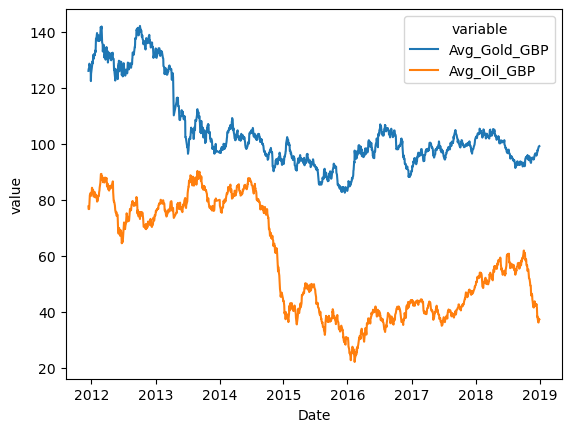

In [17]:
gold_oil['Date']=pd.to_datetime(gold_oil['Date'])

# Plot a linechart for both Gold & Oil Prices
sns.lineplot(x='Date', y='value', hue='variable', data=pd.melt(gold_oil, ['Date']))


Based on the above plot, we can arrive at the conclusion that the "daily average" price of Gold was <b>always higher</b> than Oil.

### 3e. Distribution of daily average price

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


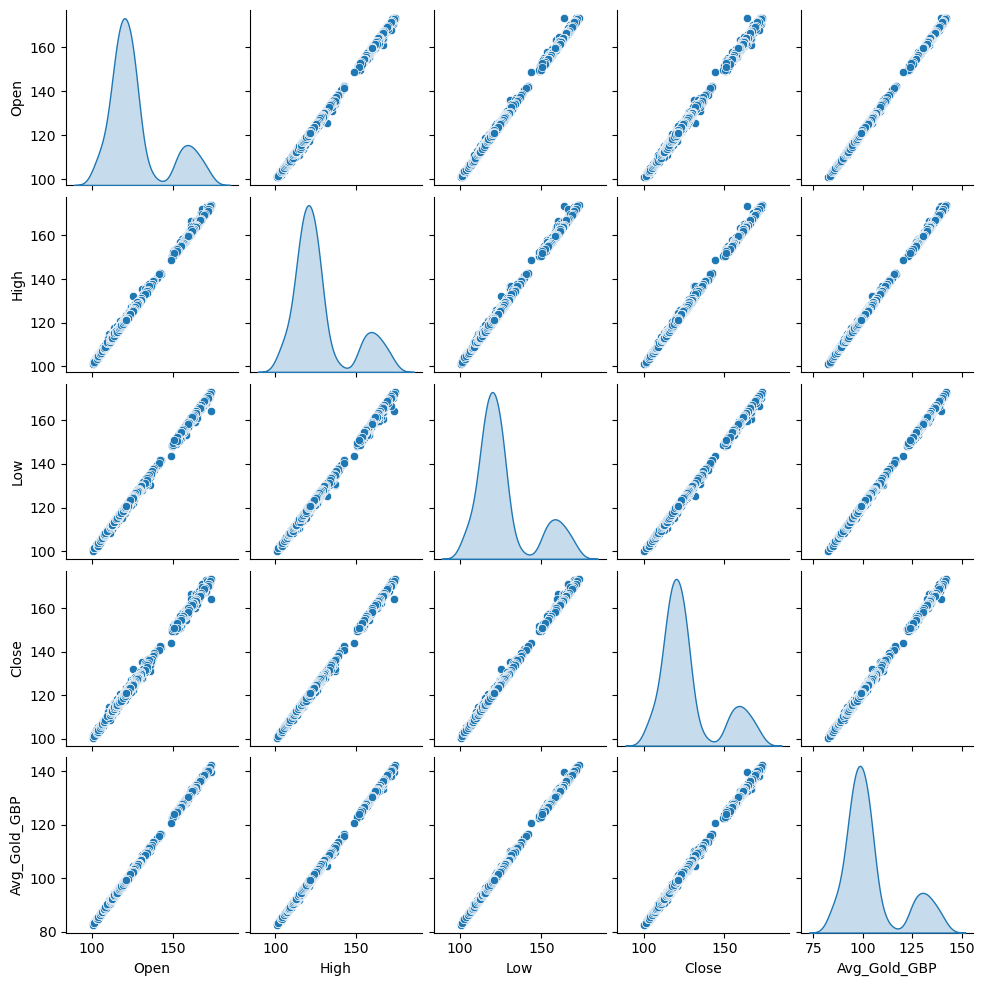

In [18]:
# Check for outliers in the gold_subset df 
sns.pairplot(gold_subset[['Open', 'High', 'Low', 'Close', 'Avg_Gold_GBP']], diag_kind='kde', height=2);

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


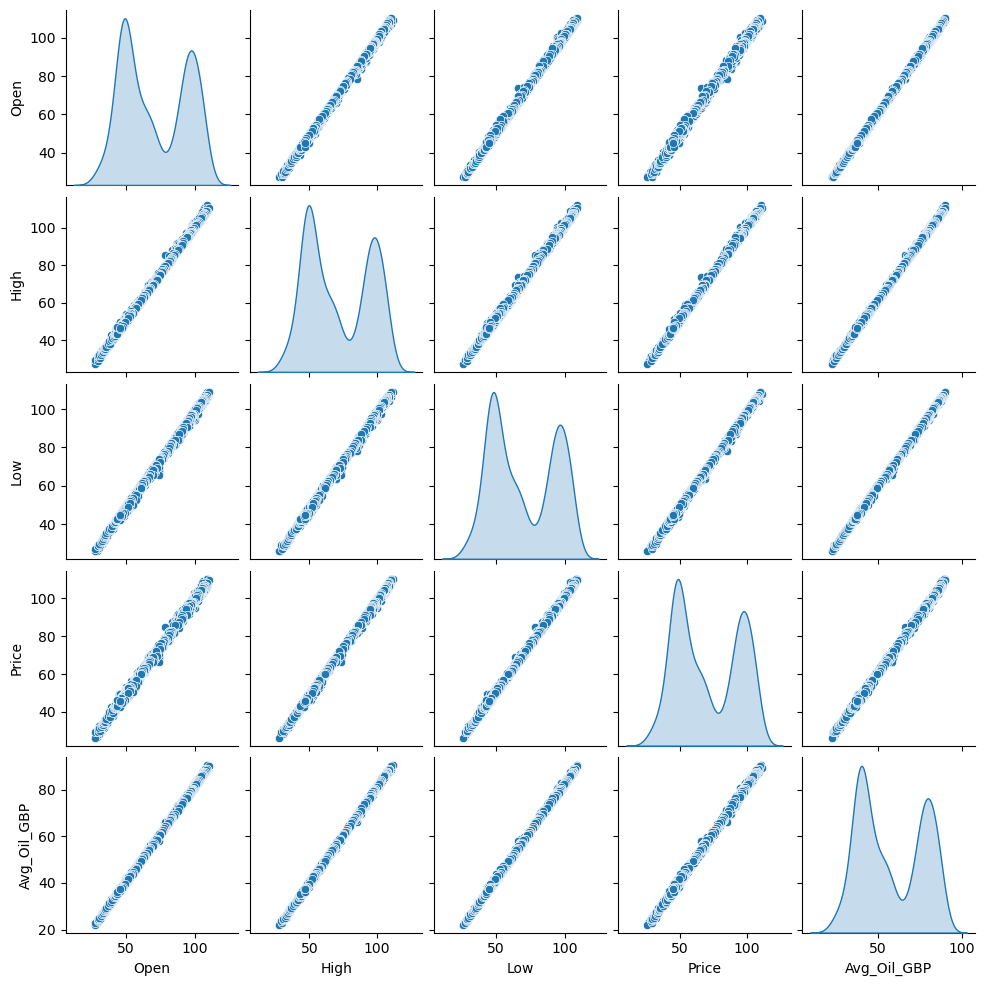

In [19]:
# Check for outliers in the oil_subset df 
sns.pairplot(oil_subset[['Open', 'High', 'Low', 'Price', 'Avg_Oil_GBP']], diag_kind='kde', height=2);

From the above pairplots of Gold & Oil Subsets, we can clearly see that the data has <b>"bimodal" distribution</b>.

### 3f. Best performing commodity in Dec 2015

In [20]:
# Filter the two data sets between the specified dates, and save them as filtered_gold_df and filtered_oil_df. 
filtered_gold_oil = gold_oil[(gold_oil['Date'] >'2015-12-01') & (gold_oil['Date'] < '2015-12-31')]

filtered_gold_oil

,Date,Avg_Gold_GBP,Avg_Oil_GBP
953,2015-12-02,82.882865,33.756667
954,2015-12-03,83.107001,33.346667
955,2015-12-04,84.624000,33.595400
956,2015-12-07,84.511934,32.185000
957,2015-12-08,84.438133,30.859333
958,2015-12-09,84.626734,31.083467
959,2015-12-10,84.099200,30.391933
960,2015-12-11,83.935201,29.692200
961,2015-12-14,83.924267,29.145533
962,2015-12-15,83.415867,30.129533


(array([16770., 16774., 16778., 16782., 16786., 16790., 16794., 16798.]),
 [Text(16770.0, 0, '2015-12-01'),
  Text(16774.0, 0, '2015-12-05'),
  Text(16778.0, 0, '2015-12-09'),
  Text(16782.0, 0, '2015-12-13'),
  Text(16786.0, 0, '2015-12-17'),
  Text(16790.0, 0, '2015-12-21'),
  Text(16794.0, 0, '2015-12-25'),
  Text(16798.0, 0, '2015-12-29')])

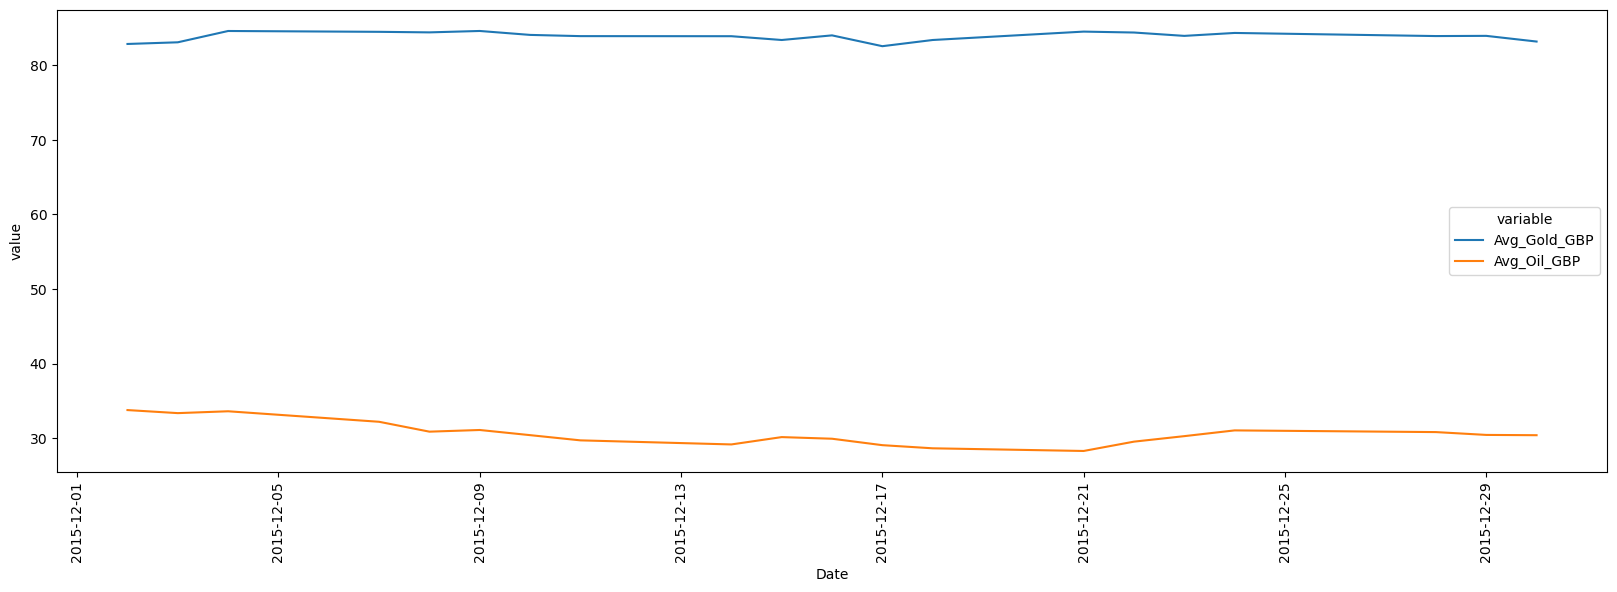

In [21]:
# Plots the December performance of both gold & oil.
plt.figure(figsize=(20, 6))

# Create barplot.
sns.lineplot(x='Date', y='value', hue='variable', data=pd.melt(filtered_gold_oil, ['Date']))

# Rotate x-axis labels
plt.xticks(rotation=90)

Based on the above plot, we can conclude that Gold was the <b>best performing commodity</b> in the month of December 2015.

### 3g. Outlier analysis on "open" value of commodities

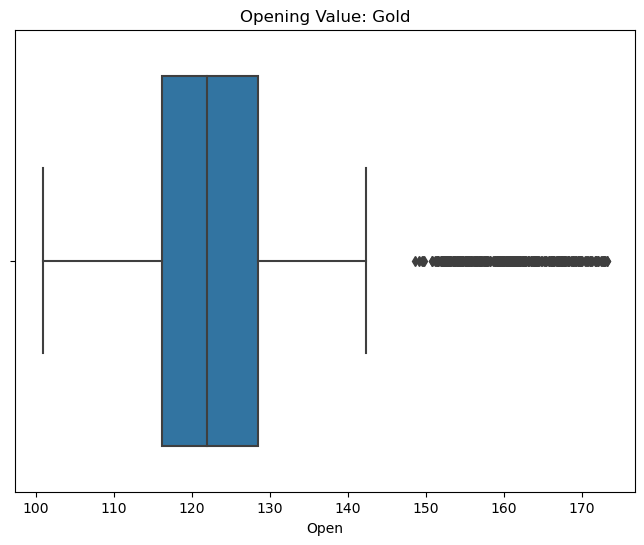

In [22]:
# Boxplot of "Gold" subset's "open" values
plt.figure(figsize=(8, 6))

plt.title("Opening Value: Gold")
sns.boxplot(x=gold_subset['Open']);

The Boxplot shows clear outliers in opening value of Gold.

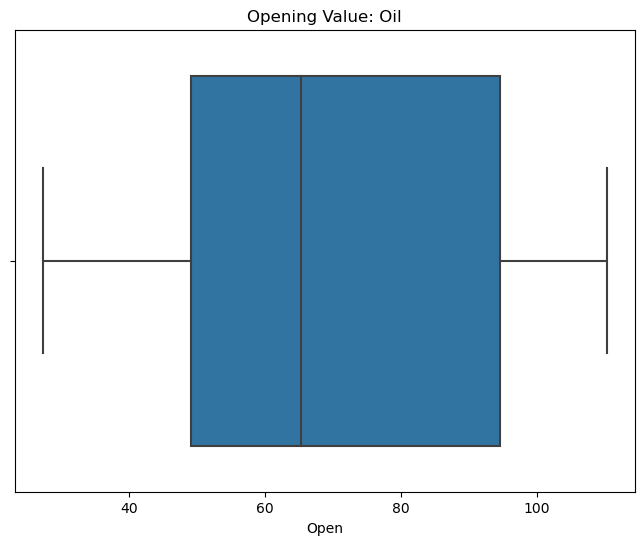

In [23]:
# Boxplot of "Oil" subset's "open" values
plt.figure(figsize=(8, 6))

plt.title("Opening Value: Oil")
sns.boxplot(x=oil_subset['Open']);

The Boxplot for Oil does not show any outliers. 

### 3h. What happened to the value of Gold & Oil during June 2016?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2016-06-02'),
  Text(1, 0, '2016-06-03'),
  Text(2, 0, '2016-06-06'),
  Text(3, 0, '2016-06-07'),
  Text(4, 0, '2016-06-08'),
  Text(5, 0, '2016-06-09'),
  Text(6, 0, '2016-06-10'),
  Text(7, 0, '2016-06-13'),
  Text(8, 0, '2016-06-14'),
  Text(9, 0, '2016-06-15'),
  Text(10, 0, '2016-06-16'),
  Text(11, 0, '2016-06-17'),
  Text(12, 0, '2016-06-20'),
  Text(13, 0, '2016-06-21'),
  Text(14, 0, '2016-06-22'),
  Text(15, 0, '2016-06-23'),
  Text(16, 0, '2016-06-24'),
  Text(17, 0, '2016-06-27'),
  Text(18, 0, '2016-06-28'),
  Text(19, 0, '2016-06-29')])

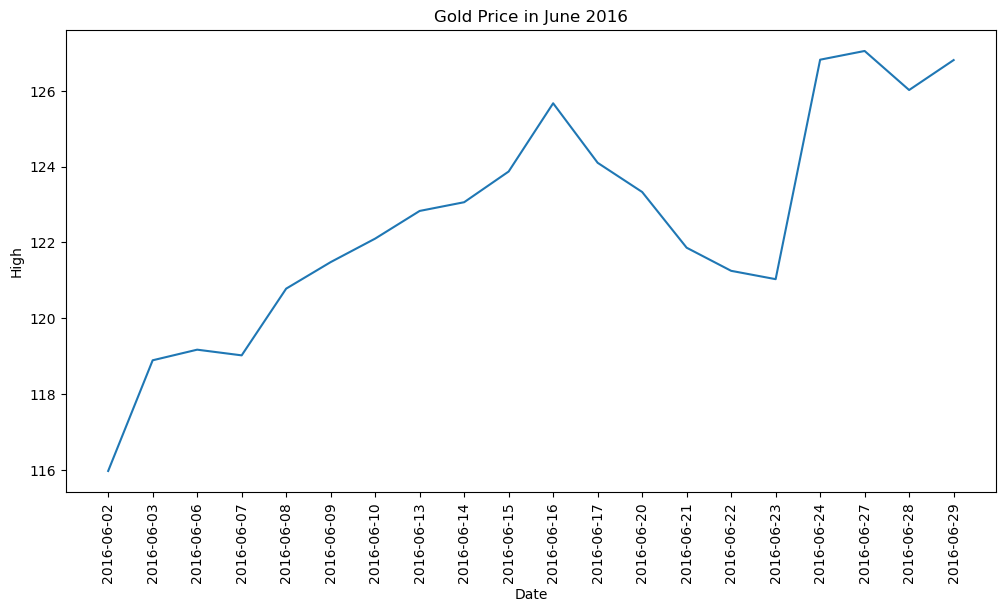

In [24]:
# Create a filtered dataset to contain all June values
gold_jun16 = gold_subset[(gold_subset['Date'] >'2016-06-01') & (gold_subset['Date'] < '2016-06-30')]

# Plot the graph for "high" values
plt.figure(figsize = (12, 6))
sns.lineplot(data=gold_jun16, x='Date', y='High').set(title="Gold Price in June 2016")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2016-06-02'),
  Text(1, 0, '2016-06-03'),
  Text(2, 0, '2016-06-06'),
  Text(3, 0, '2016-06-07'),
  Text(4, 0, '2016-06-08'),
  Text(5, 0, '2016-06-09'),
  Text(6, 0, '2016-06-10'),
  Text(7, 0, '2016-06-13'),
  Text(8, 0, '2016-06-14'),
  Text(9, 0, '2016-06-15'),
  Text(10, 0, '2016-06-16'),
  Text(11, 0, '2016-06-17'),
  Text(12, 0, '2016-06-20'),
  Text(13, 0, '2016-06-21'),
  Text(14, 0, '2016-06-22'),
  Text(15, 0, '2016-06-23'),
  Text(16, 0, '2016-06-24'),
  Text(17, 0, '2016-06-27'),
  Text(18, 0, '2016-06-28'),
  Text(19, 0, '2016-06-29')])

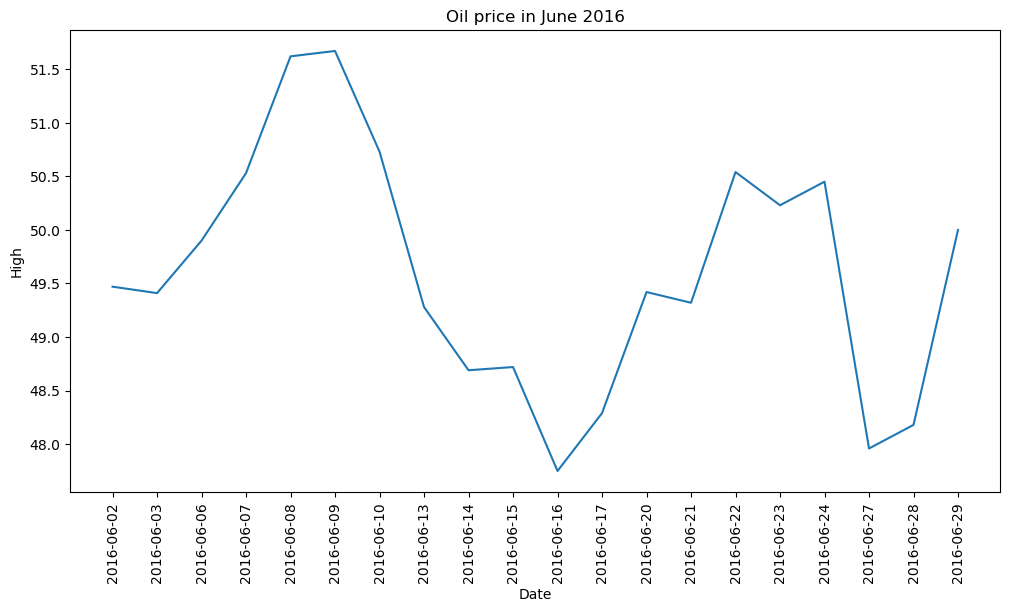

In [25]:
# Create a filtered dataset to contain all June values
oil_jun16 = oil_subset[(oil_subset['Date'] >'2016-06-01') & (oil_subset['Date'] < '2016-06-30')]

# Plot the graph for "high" values
plt.figure(figsize = (12, 6))
sns.lineplot(data=oil_jun16, x='Date', y='High').set(title="Oil price in June 2016")
plt.xticks(rotation=90)

From the above 2 plots, we can arrive at the following conclusions:
- Gold showed a positive trend (price increase) between 01-Jun to 30-Jun
- Oil was highly volatile (rice & fall) during the same period

## Conclusion

Based on the above analysis - 
- Gold has significantly outperformed Oil, both in terms of price & volume
- Oil stocks are highly volatile in nature

Hence the appropriate action will be to invest in Gold stocks.